In [1]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.fundamentaldata import FundamentalData

import matplotlib
import matplotlib.pyplot as plt
import os

#making plots bigger
#matplotlib.rcParams['figure.figsize'] = (50, 20)

# magic function (idk what it does)
#%matplotlib inline

## Some Disclaimer
AlphaVantage isn't perfect. It is a free open source finance API that comes with lots of imcomplete information and functions. Particularly: 

- TimeSeries do not have an argument to edit the number of observations. 'outputsize' is limited to 'compact or full'. 
- TechIndicators do not have argument to edit number of observations. 'timeperiod' is refered to the number of observations used to obtain averages, not "to be included as data points". 
- Intraday data are very outdated. You cannot use it for live trading. This is particularly important if you plan on using volume data to make informed trades. 
- at interval = '60min', there are 16 observations per day.
- at interval = '30min', there are 26 observations per day. 
- Daily observations starts 0830 hrs and ends at 2000 hrs.


## Time Series

In [3]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key = 'NQFFPAG3ZLJNCK5X', output_format = 'pandas')
    #important to have 'pandas' to print

            1. open  2. high  3. low  4. close  5. adjusted close   6. volume  \
date                                                                            
2020-09-25  90.7573  98.4800    90.5     97.73              97.73  45866013.0   
2020-09-24  93.9000  95.2499    88.0     88.56              88.56  34327751.0   

            7. dividend amount  8. split coefficient  
date                                                  
2020-09-25                 0.0                   1.0  
2020-09-24                 0.0                   1.0  


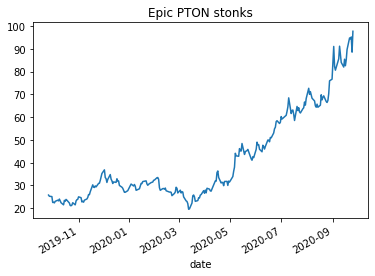

In [7]:
pton_p, pton_m = ts.get_daily_adjusted(symbol = "PTON", outputsize = 'full')
print(pton_p.head(2))

pton_p['5. adjusted close'].plot()
    # choose either '1. open', '2. high', etc. It is found from the columns printed from head()
plt.title('Epic PTON stonks')
plt.show()

## Volume Analysis

In [9]:
ti = TechIndicators(key = 'NQFFPAG3ZLJNCK5X', output_format = 'pandas')

### Chaikin A/D Line
Accumulation/distribution is a cumulative indicator that uses volume and price to assess whether a stock is being accumulated or distributed. The accumulation/distribution measure seeks to identify divergences between the stock price and volume flow. This provides insight into how strong a trend is. 

- The A/D indicator is cumulative, meaning one period's value is added or subtracted from the last.
- If the price is rising but the indicator is falling this indicates that buying or accumulation volume may not be enough to support the price rise and a price decline could be forthcoming. 
- If the price of an asset is falling but A/D is rising, it signals underlying strength and the price may start to rise.


            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-09-25  90.7573  98.4800    90.5     97.73  45866013.0
2020-09-24  93.9000  95.2499    88.0     88.56  34327751.0


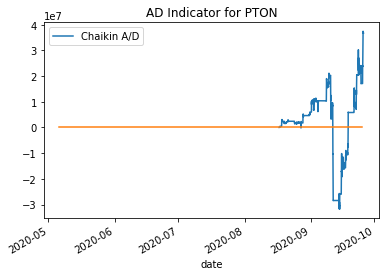

In [68]:
pton_ad, q = ti.get_ad(symbol = 'pton', interval = '30min')

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.head(2))

pton_ad.plot()
pton_p['4. close'].plot()
plt.title('AD Indicator for PTON')
plt.show()
    # how do you do a side-by-side chart on python? 
    # note the yellow straight line. It is the price chart that it's so small compared to the volume chart. 


### Chaikin A/D Oscillator
As many traders say, price follows volume, and this indicator is used to analyze the current momentum of the price to predict future price movements. Chaikin A/D Oscillator fluctuates around the value zero. Every time that the indicator crosses goes changes from positive to negative, it suggests that the momentum of the price is changing.

A Chaikin Oscillator reading above zero indicates net buying pressure, while below zero registers net selling pressure. Divergence between the indicator and pure price moves are the most common signals from the indicator, and often flag market turning points. 


                            ADOSC
date                             
2020-08-17 11:30:00  5.277831e+04
2020-08-17 12:00:00  8.653017e+04
2020-08-17 12:30:00  1.316529e+05
2020-08-17 13:00:00  1.343783e+05
2020-08-17 13:30:00  8.949329e+04
...                           ...
2020-09-25 18:00:00  1.954760e+06
2020-09-25 18:30:00  1.600707e+06
2020-09-25 19:00:00  1.309795e+06
2020-09-25 19:30:00  1.071468e+06
2020-09-25 20:00:00  8.779018e+05

[835 rows x 1 columns]
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-09-25  90.7573  98.4800    90.5     97.73  45866013.0
2020-09-24  93.9000  95.2499    88.0     88.56  34327751.0


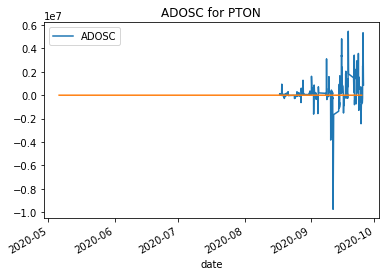

In [67]:
pton_ado, q = ti.get_adosc(symbol = 'pton', interval = '30min')
print(pton_ado)
    # at interval = '60min', there are 16 observations per day.
    # at interval = '30min', there are 26 observations per day. 
    # Daily observations starts 0830 hrs and ends at 2000 hrs.

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.head(2))

pton_ado.plot()
pton_p['4. close'].plot()
plt.title('ADOSC for PTON')
plt.show()
    

### On Balance Volume Value 
On Balance Volume (OBV) measures buying and selling pressure as a cumulative indicator that adds volume on up days and subtracts volume on down days. When the security closes higher than the previous close, all of the day’s volume is considered up-volume. When the security closes lower than the previous close, all of the day’s volume is considered down-volume. 

How this indicator works: 
The actual value of the OBV is unimportant; concentrate on its direction.

- When both price and OBV are making higher peaks and higher troughs, the upward trend is likely to continue.
- When both price and OBV are making lower peaks and lower troughs, the downward trend is likely to continue.
- During a trading range, if the OBV is rising, accumulation may be taking place—a warning of an upward breakout.
- During a trading range, if the OBV is falling, distribution may be taking place—a warning of a downward breakout.
- When price continues to make higher peaks and OBV fails to make higher peaks, the upward trend is likely to stall or fail. This is called a negative divergence.
- When price continues to make lower troughs and OBV fails to make lower troughs, the downward trend is likely to stall or fail. This is called a positive divergence.



                            ADOSC
date                             
2020-08-17 11:30:00  5.277831e+04
2020-08-17 12:00:00  8.653017e+04
2020-08-17 12:30:00  1.316529e+05
2020-08-17 13:00:00  1.343783e+05
2020-08-17 13:30:00  8.949329e+04
...                           ...
2020-09-25 18:00:00  1.954760e+06
2020-09-25 18:30:00  1.600707e+06
2020-09-25 19:00:00  1.309795e+06
2020-09-25 19:30:00  1.071468e+06
2020-09-25 20:00:00  8.779018e+05

[835 rows x 1 columns]
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-09-25  90.7573  98.4800    90.5     97.73  45866013.0
2020-09-24  93.9000  95.2499    88.0     88.56  34327751.0


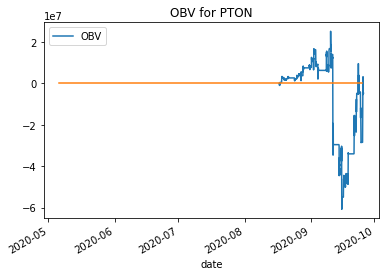

In [65]:
pton_obv, q = ti.get_obv(symbol = 'pton', interval = '30min')
print(pton_ado)

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.head(2))

pton_obv.plot()
pton_p['4. close'].plot()
plt.title('OBV for PTON')
plt.show()
    # looks very similar to pton_ad chart. 


### Money Flow Index
Instead of looking at the volume (number of shares traded) or price (RSI) as an indicator of identifying overbought or oversold conditions, the Money Flow Index incorporates both price and volume data. For this reason, some analysts call MFI the volume-weighted RSI.

The Formulas for the Money Flow Index Are:

    Money Flow Index = 100 − 100/(1 + Money Flow Ratio)
 
where:

    Money Flow Ratio = 14 Period Positive Money Flow / 14 Period Negative Money Flow
    Raw Money Flow = Typical Price * Volume


                MFI
date               
2020-09-24  54.6873
2020-09-25  59.3169
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-07    45.69   45.700   40.80     44.12  53226012.0
2020-05-06    36.83   39.256   35.21     38.03  27262600.0


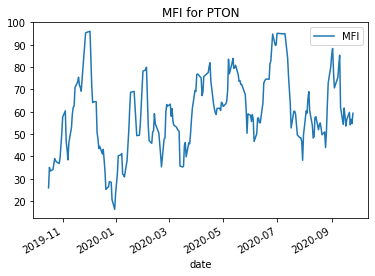

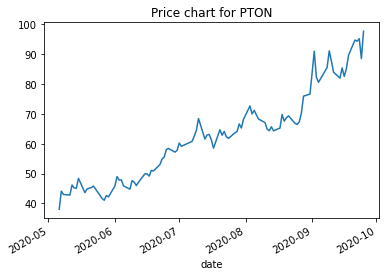

In [111]:
pton_mfi, q = ti.get_mfi(symbol = 'pton', interval = 'daily', time_period = 14)
print(pton_mfi.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

pton_mfi.plot()
plt.title('MFI for PTON')
plt.show() 

pton_p['4. close'].plot()
plt.title('Price chart for PTON')
plt.show()

### Hilbert Transformed Instantaneous Trendline
The [Hilbert Transform](http://www2.wealth-lab.com/WL5Wiki/HTTrendLine.ashx) is a technique used to generate inphase and quadrature components of a de-trended real-valued "analytic-like" signal (such as a Price Series) in order to analyze variations of the instantaneous phase and amplitude. HTTrendline (or MESA Instantaneous Trendline) returns the Price Series value after the Dominant Cycle of the analytic signal as generated by the Hilbert Transform has been removed. The Dominant Cycle can be thought of as being the "most likely" period (in the range of 10 to 40) of a sine function of the Price Series.

Basically, lots of fancy math going behind that is still out of my expertise to describe.

                     HT_TRENDLINE
date                             
2020-09-25 19:00:00       93.4089
2020-09-25 20:00:00       93.5178
                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-09-17 16:00:00    83.55     85.7   83.10   85.3799  5234718.0
2020-09-17 15:00:00    83.57     84.5   83.44   83.5600  3270086.0


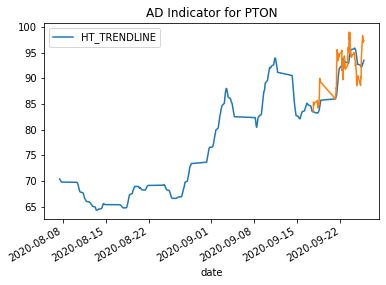

In [64]:
pton_htt, q = ti.get_ht_trendline(symbol = 'pton', interval = '60min')
print(pton_htt.tail(2))

pton_p, pton_m = ts.get_intraday(symbol = "pton", interval = '60min')
print(pton_p.tail(2))

pton_htt.plot()
pton_p['4. close'].plot()

plt.title('HTT for PTON')
plt.show()

### Hilbert Transformed Sine Waves Value
Again, I have no idea what it does. 

                     HT_TRENDLINE
date                             
2020-09-25 19:00:00       93.4089
2020-09-25 20:00:00       93.5178
                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-09-17 16:00:00    83.55     85.7   83.10   85.3799  5234718.0
2020-09-17 15:00:00    83.57     84.5   83.44   83.5600  3270086.0


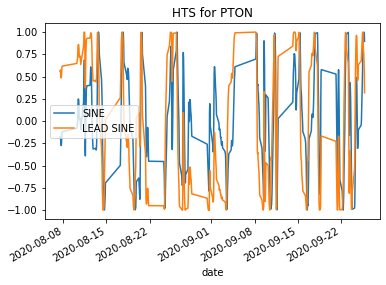

In [70]:
pton_hts, q = ti.get_ht_sine(symbol = 'pton', interval = '60min')
print(pton_htt.tail(2))

pton_p, pton_m = ts.get_intraday(symbol = "pton", interval = '60min')
print(pton_p.tail(2))

pton_hts.plot()
#pton_p['4. close'].plot()

plt.title('HTS for PTON')
plt.show()

## Moving Averages
Moving averages are commonly used in finances and are probably too overused to get any useful alpha. Nonetheless, it remains an important indicator at least to understand what the majority of traders are thinking. Most of the time, traders refer to these MA lines (aka lookback period) to confirm which MAs are more useful at predicting the direction of a security. 

Mathematically, they are unreliable at determining the value or even the demand of a security (via volume). But well, it's still useful at understanding how technical traders think. 

The **Simple Moving Average (SMA)** is calculated by adding the price of an instrument over a number of time periods and then dividing the sum by the number of time periods. The SMA is basically the average price of the given time period, with equal weighting given to the price of each period. **The 'timeperiod' argument within each moving average functions will reflect the statement before it.**

An **exponential moving average (EMA)** places a greater weight and significance on the most recent data points, meaning it reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period. **Weighted moving averages (WMA)** also assign a heavier weighting to more current data points similar to EMA, just that the formula is different. 

Prepare for trouble. Make it double. The **double exponential moving average (DEMA)** is an expansion of EMA, but responds quicker to price changes (less lag) than a normal exponential moving average (EMA). Note that less lag isn't always a good thing because lag helps filter out noise. An indicator with less lag is more prone to reacting to noise or small inconsequential price moves. A 100 periods DEMA will react slower to shorter time frame DEMAs, like 10 periods. 

If double isn't enough, there's a **triple exponential moving average (TEMA)** to consider. Obviously, they are more sensitive to price changes than DEMA or EMA and they do not tell you anything about the company or the demand for their shares. But it is still a useful indicator for lookbacks. 

Other MA methods that are available in this package include: **Triangular Moving Average (TRIMA), Kaufman Adaptive Moving Average (KAMA), MESA Adaptive Moving Average (MAMA).** There is also **Volume Weighted Moving Average (VWAP)** for intraday analysis. 



                SMA
date               
2020-09-24  85.3530
2020-09-25  86.7245
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-07    45.69   45.700   40.80     44.12  53226012.0
2020-05-06    36.83   39.256   35.21     38.03  27262600.0


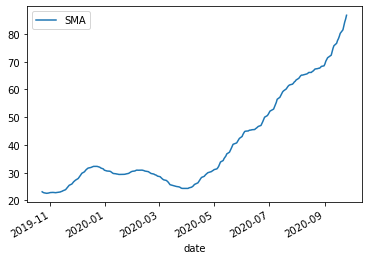

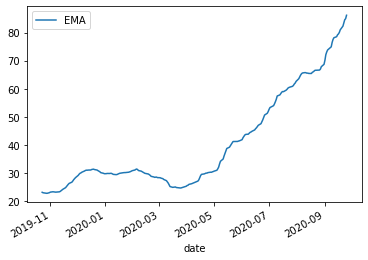

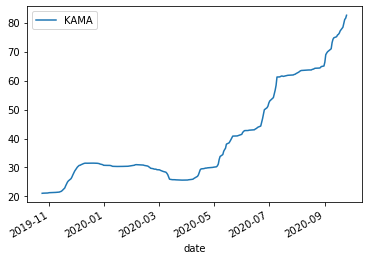

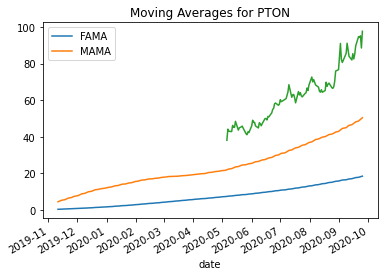

In [97]:

#pton_wma, q = ti.get_wma(symbol = 'pton', interval = 'daily', time_period = 20)
#pton_dema, q = ti.get_dema(symbol = 'pton', interval = 'daily', time_period = 20)
#pton_tema, q = ti.get_tema(symbol = 'pton', interval = 'daily', time_period = 20)
#pton_trima, q = ti.get_trima(symbol = 'pton', interval = 'daily', time_period = 20)

pton_sma, q = ti.get_sma(symbol = 'pton', interval = 'daily', time_period = 20)
pton_ema, q = ti.get_ema(symbol = 'pton', interval = 'daily', time_period = 20)
pton_kama, q = ti.get_kama(symbol = 'pton', interval = 'daily', time_period = 20)
pton_mama, q = ti.get_mama(symbol = 'pton', interval = 'daily')
print(pton_sma.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

#pton_wma.plot()
#pton_dema.plot()
#pton_tema.plot()
#pton_trima.plot()

pton_sma.plot()
pton_ema.plot()
pton_kama.plot()
pton_mama.plot()
pton_p['4. close'].plot()

plt.title('Moving Averages for PTON')
plt.show()
    # You will likely get an error for exceeding AlphaVantage's maximum API call. Simply comment out uninteresting MAs and plot again.

## Other Technical Analysis Methods
### Moving Average Convergence Divergence

Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. [Most commonly](https://school.stockcharts.com/doku.php?id=technical_indicators:moving_average_convergence_divergence_macd), the MACD is calculated by subtracting the "slow" 26-period Exponential Moving Average (EMA) from the "fast" 12-period EMA. Time period can be edited accordingly. 

Essential Keyword Arguments:
- symbol:  the symbol for the equity we want to get its data
- interval:  time interval between two conscutive values, supported values are '1min', '5min', '15min', '30min', '60min', 'daily', 'weekly', 'monthly' (default 'daily')
- fastperiod:  Positive integers are accepted (default=None)
- slowperiod:  Positive integers are accepted (default=None)
- signalperiod:  Positive integers are accepted (default=None)
- fastmatype:  Moving average type for the faster moving average. By default, fastmatype=0. Integers 0 - 8 are accepted
- slowmatype:  Moving average type for the slower moving average. By default, slowmatype=0. Integers 0 - 8 are accepted
- signalmatype:  Moving average type for the signal moving average. By default, signalmatype=0. Integers 0 - 8 are accepted

 * 0 = Simple Moving Average (SMA),
 * 1 = Exponential Moving Average (EMA),
 * 2 = Weighted Moving Average (WMA),
 * 3 = Double Exponential Moving Average (DEMA),
 * 4 = Triple Exponential Moving Average (TEMA),
 * 5 = Triangular Moving Average (TRIMA),
 * 6 = T3 Moving Average,
 * 7 = Kaufman Adaptive Moving Average (KAMA),
 * 8 = MESA Adaptive Moving Average (MAMA)


              MACD  MACD_Hist  MACD_Signal
date                                      
2019-11-13  0.2988     0.3355      -0.0367
2019-11-12  0.1070     0.2276      -0.1206
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-07    45.69   45.700   40.80     44.12  53226012.0
2020-05-06    36.83   39.256   35.21     38.03  27262600.0


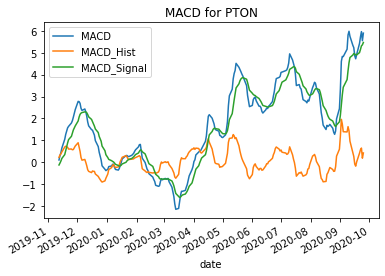

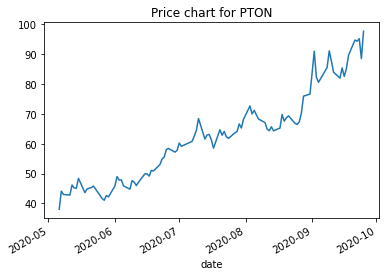

In [93]:
pton_macd, q = ti.get_macd(symbol = 'pton', interval = 'daily', fastperiod = 12, slowperiod = 26, signalperiod = 9)
print(pton_macd.tail(2))

# On customizing MA for MACD, use 'get_macdext'
# pton_macdext, q = ti.get_macdext(symbol = 'pton', interval = 'daily', fastperiod = 12, slowperiod = 26, signalperiod = 9,
#                                  fastmatype = 1, slowmatype = 1, signalmatype = 1)
# print(pton_macdext.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

pton_macd.plot()
#
# pton_macdext.plot()
#
    # You will also likely get an error for exceeding AV's call limit. Apparently, macdext() counts as 3 calls. 

plt.title('MACD for PTON')
plt.show()

pton_p['4. close'].plot()
plt.title('Price chart for PTON')
plt.show()

### Bollinger Bands
Bollinger Bands are price range plotted at a standard deviation level above and below a simple moving average of the price. Because the distance of the bands is based on standard deviation, they adjust to volatility swings in the underlying price. Bollinger bands help determine whether prices are high or low on a relative basis. 

[Commonly used settings](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands): 
- Short term: 10 day moving average, bands at 1.5 standard deviations.
- Medium term: 20 day moving average, bands at 2 standard deviations.
- Long term: 50 day moving average, bands at 2.5 standard deviations.

            Real Middle Band  Real Upper Band  Real Lower Band
date                                                          
2019-10-24           22.9102          25.1790          20.6415
2019-10-23           23.1313          25.5976          20.6649
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-08    42.11    43.27   41.27     43.00  21728675.0
2020-05-07    45.69    45.70   40.80     44.12  53226012.0


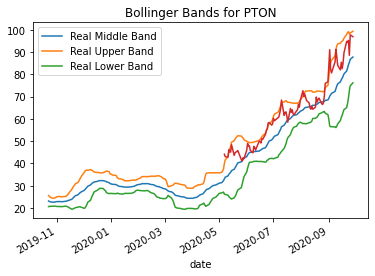

In [114]:
pton_bbands, q = ti.get_bbands(symbol = 'pton', interval = 'daily', time_period = 20,
                               nbdevup = 2, nbdevdn = 2, matype = 0)
print(pton_bbands.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

pton_bbands.plot()
pton_p['4. close'].plot()
plt.title('Bollinger Bands for PTON')
plt.show() 

### Stochastic Oscillator

A [stochastic oscillator](https://www.investopedia.com/terms/s/stochasticoscillator.asp) is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. The sensitivity of the oscillator to market movements is reducible by adjusting that time period or by taking a moving average of the result. It is used to generate overbought and oversold trading signals, utilizing a 0-100 bounded range of values. 

Readings over 80 are considered in the overbought range, and readings under 20 are considered oversold. However, these are not always a rule of thumb to follow; very strong trends can maintain overbought or oversold conditions for an extended period. It still takes human judgment to make an accurate deduction.

The Stochastic Oscillator is displayed as two lines. The main line is called **"K"**. The second line, called **"D"**, is a moving average of **K**. There are several ways to interpret a Stochastic Oscillator. Three popular methods include:

- Buy when the Oscillator (either K or D) falls below a specific level (e.g., 20) and then rises above that level. 
- Sell when the Oscillator rises above a specific level (e.g., 80) and then falls below that level.
- Buy when the K line rises above the D line and sell when the K line falls below the D line.


              SlowD    SlowK
date                        
2019-12-04  61.9393  69.0544
2019-12-03  60.6456  69.5917
              FastD    FastK
date                        
2019-10-29  37.8029  64.4550
2019-10-28  32.9570  23.6967
              FastD  FastK
date                      
2019-11-18  83.5361  100.0
2019-11-15  83.5361  100.0
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-07    45.69   45.700   40.80     44.12  53226012.0
2020-05-06    36.83   39.256   35.21     38.03  27262600.0


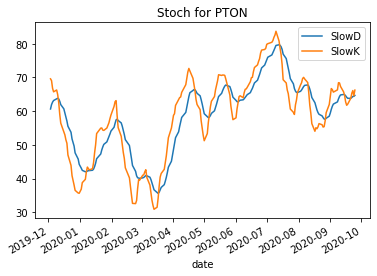

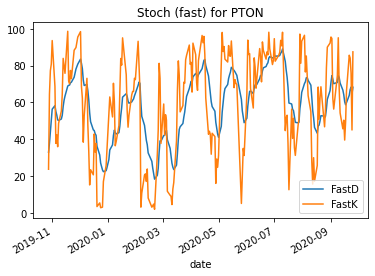

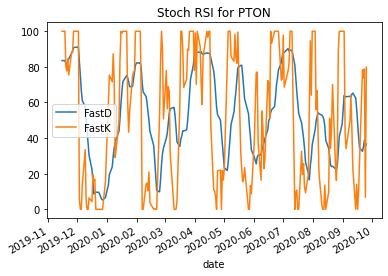

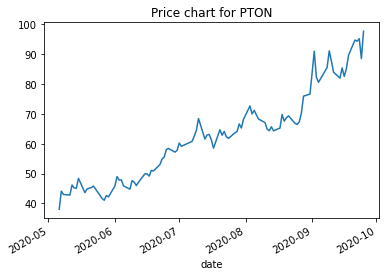

In [98]:
pton_stoch, q = ti.get_stoch(symbol = 'pton', interval = 'daily', fastkperiod = 12, slowkperiod = 26, slowdperiod = 12,
                             slowkmatype = 1, slowdmatype = 1)
print(pton_stoch.tail(2))

# Only fast
pton_stochf, q = ti.get_stochf(symbol = 'pton', interval = 'daily', fastkperiod = 12, fastdperiod = 12,
                                 fastdmatype = 1)
print(pton_stochf.tail(2))

# StochRSI
pton_stochrsi, q = ti.get_stochrsi(symbol = 'pton', interval ='daily', time_period = 14,
                                   fastkperiod = 12, fastdperiod = 12, fastdmatype = 0)
print(pton_stochrsi.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

pton_stoch.plot()
plt.title('Stoch for PTON')
plt.show()

pton_stochf.plot()
plt.title('Stoch (fast) for PTON')
plt.show()

pton_stochrsi.plot()
plt.title('Stoch RSI for PTON')
plt.show()

pton_p['4. close'].plot()
plt.title('Price chart for PTON')
plt.show()


### Relative Strength Index (RSI) 
The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100. The RSI will rise as the number and size of positive closes increase, and it will fall as the number and size of losses increase.

Rule of thumb for the RSI are values of 70 or above indicate overbought or overvalued and may be primed for a trend reversal. An RSI reading of 30 or below indicates an oversold or undervalued condition. The standard is to use 14 periods to calculate the initial RSI value.

### RSI vs Stochastic Oscillator
Relative strength index was designed to measure the speed of price movements, the stochastic oscillator formula works best when the market is trading in consistent ranges. Generally speaking, RSI is more useful in trending markets, and stochastics are more useful in sideways or choppy markets.

                RSI
date               
2020-09-24  57.2280
2020-09-25  64.7644
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-07    45.69   45.700   40.80     44.12  53226012.0
2020-05-06    36.83   39.256   35.21     38.03  27262600.0


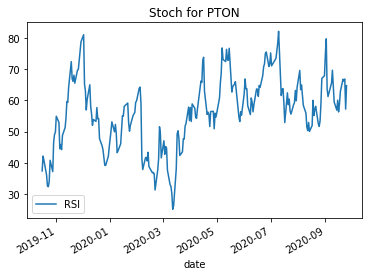

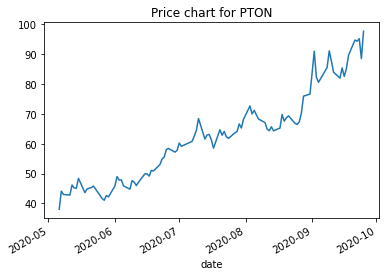

In [99]:
pton_rsi, q = ti.get_rsi(symbol = 'pton', interval = 'daily', time_period = 14)
print(pton_rsi.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

pton_rsi.plot()
plt.title('RSI for PTON')
plt.show()

pton_p['4. close'].plot()
plt.title('Price chart for PTON')
plt.show()

### Average Direction Movement Index (ADX)
ADX stands for Average Directional Movement Index and can be used to help measure the overall strength of a trend.

[How this indicator works](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/adx)
- Wilder suggests that a strong trend is present when ADX is above 25 and no trend is present when below 20.
- When the ADX turns down from high values, then the trend may be ending. You may want to do additional research to determine if closing open positions is appropriate for you.
- If the ADX is declining, it could be an indication that the market is becoming less directional, and the current trend is weakening. You may want to avoid trading trend systems as the trend changes.
- If after staying low for a lengthy time, the ADX rises by 4 or 5 units, (for example, from 15 to 20), it may be giving a signal to trade the current trend.
- If the ADX is rising then the market is showing a strengthening trend. The value of the ADX is proportional to the slope of the trend. The slope of the ADX line is proportional to the acceleration of the price movement (changing trend slope). If the trend is a constant slope then the ADX value tends to flatten out.

### Average Direction Movement Index Rating (ADXR) 
ADXR quantifies the change in momentum of the Average Directional Index (ADX). 
    
    ADXR = (ADX + ADX n-periods ago) / 2

The ADXR is used in the same way as the ADX – the higher the ADXR reading, the stronger the trend. As a rule of thumb, trend-following strategies are used when the ADXR shows a reading higher than 25. ADXR values above 40 are indicative of very strong trending environment, while values below 20 suggest that the market is in a trading range.

ADXR is a lagging indicator (slow) and will usually provide signals after the ADX (fast) does. Technical analysts can use it like the MA methods and refer ADXR in the form of a signal line applied to the ADX. When ADX goes above ADXR, buy. When it goes lower, sell. 



                ADX
date               
2020-09-24  31.1385
2020-09-25  31.1446
               ADXR
date               
2020-09-24  29.3091
2020-09-25  29.5915
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-07    45.69   45.700   40.80     44.12  53226012.0
2020-05-06    36.83   39.256   35.21     38.03  27262600.0


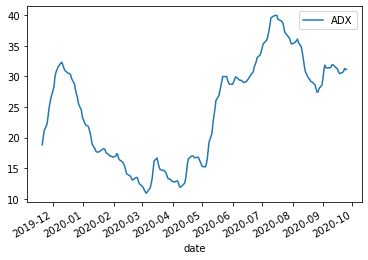

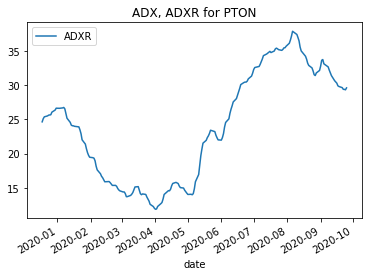

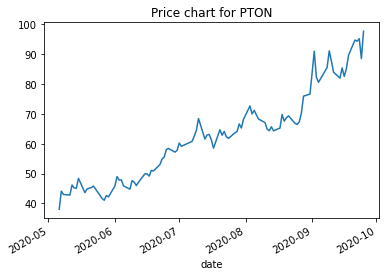

In [101]:
pton_adx, q = ti.get_adx(symbol = 'pton', interval = 'daily', time_period = 20)
print(pton_adx.tail(2))

pton_adxr, q = ti.get_adxr(symbol = 'pton', interval = 'daily', time_period = 20)
print(pton_adxr.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

pton_adx.plot()
pton_adxr.plot()
plt.title('ADX, ADXR for PTON')
plt.show()
    # why can't I stack the plots? 

pton_p['4. close'].plot()
plt.title('Price chart for PTON')
plt.show()

### Momentum Values
Momentum measures the rate of the rise or fall in stock prices. For trending analysis, momentum is a useful indicator of strength or weakness in the issue's price. The formula for momentum is:

    Momentum = V−Vx
    where: V = Latest price
           Vx = Closing price X number of days ago
           
Technicians typically use a 10-day time frame when measuring momentum. If the most recent closing price of the index is more than the closing price 10 trading days ago, the positive number (from the equation) is plotted above the zero line. Conversely, if the latest closing price is lower than the closing price 10 days ago, the negative measurement is plotted below the zero line.

When the momentum indicator slides below the zero line and then reverses in an upward direction, it doesn't necessarily mean that the downtrend is over. It merely means that the downtrend is slowing down.


              MOM
date             
2020-09-24   0.81
2020-09-25  13.69
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-07    45.69   45.700   40.80     44.12  53226012.0
2020-05-06    36.83   39.256   35.21     38.03  27262600.0


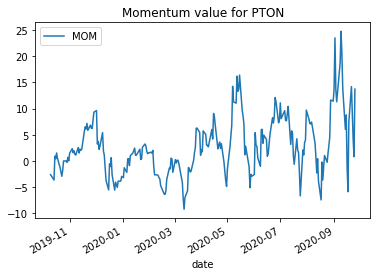

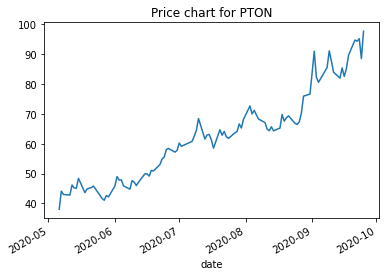

In [102]:
pton_mom, q = ti.get_mom(symbol = 'pton', interval = 'daily', time_period = 10)
print(pton_mom.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

pton_mom.plot()
plt.title('Momentum value for PTON')
plt.show() 

pton_p['4. close'].plot()
plt.title('Price chart for PTON')
plt.show()

### Balance of Power Indicator
The Balance of Power indicator measures the market strength of buyers against sellers by assessing the ability of each side to drive prices to an extreme level. IE: who are the players in control of the prices (sellers or buyers). The calculation is: 

    Balance of Power = (Close price – Open price) / (High price – Low price) 
    
Traders may use this indicator to help:
- Identify the direction of a trend.
- Find divergences between the price and the BoP in order to identify a potential trend reversal or trend continuation setup.
- Take advantage of overbought and oversold conditions.

               BOP
date              
2020-09-24 -0.7366
2020-09-25  0.8738
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-07    45.69   45.700   40.80     44.12  53226012.0
2020-05-06    36.83   39.256   35.21     38.03  27262600.0


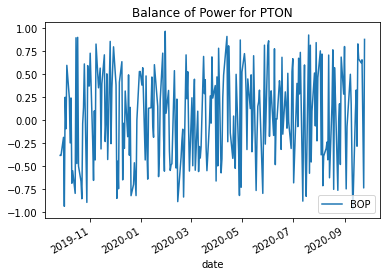

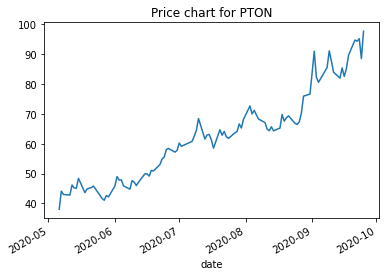

In [104]:
pton_bop, q = ti.get_bop(symbol = 'pton', interval = 'daily', time_period = 10)
print(pton_bop.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

pton_bop.plot()
plt.title('Balance of Power for PTON')
plt.show() 

pton_p['4. close'].plot()
plt.title('Price chart for PTON')
plt.show()

### Commodity Channel Index 
The CCI measures the difference between the current price and the historical average price. When the CCI is above zero it indicates the price is above the historic average. When CCI is below zero, the price is below the historic average. 

Unlike RSI or most momentum indicators ranging between 0 to 100, CCI is an unbounded indicator meaning it can go higher or lower indefinitely. For this reason, overbought and oversold levels are typically determined for each individual asset by looking at historical extreme CCI levels where the price reversed from. Example: Going from negative or near-zero readings to +100 can be used as a signal to watch for an emerging uptrend. 

The time period of 20 is most commonly used. Fewer periods results in a more volatile indicator, while more periods will make it smoother.

                 CCI
date                
2020-09-24   68.4013
2020-09-25  122.6661
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-07    45.69   45.700   40.80     44.12  53226012.0
2020-05-06    36.83   39.256   35.21     38.03  27262600.0


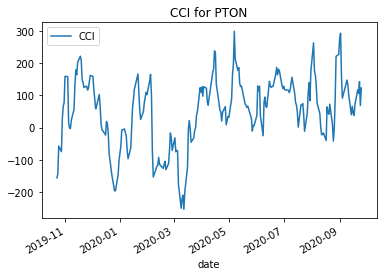

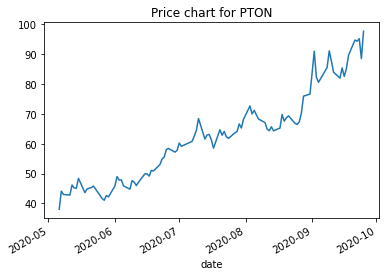

In [106]:
pton_cci, q = ti.get_cci(symbol = 'pton', interval = 'daily', time_period = 20)
print(pton_cci.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

pton_cci.plot()
plt.title('CCI for PTON')
plt.show() 

pton_p['4. close'].plot()
plt.title('Price chart for PTON')
plt.show()

### Rate of Change
The rate of change, commonly referred to as delta, is the speed at which a variable changes over a specific period of time. The formula for ROC is: 

     Price ROC = (B − A)/A *100 

where 
    
    B = price at current time
    A = price at previous time periods ago (20, if time_period = 20) 

Rate of change is also a [good indicator](https://www.investopedia.com/terms/r/rateofchange.asp) of market bubbles. Even though momentum is good and traders look for securities with a positive ROC, if a broad-market ETF, index, or mutual fund has a sharp increase in its ROC in the short term, it may be a sign that the market is unsustainable. If the ROC of an index or other broad-market security is over 50%, investors should be wary of a bubble.

                ROC
date               
2020-09-24  31.5899
2020-09-25  39.0185
              ROCR
date              
2020-09-24  1.3159
2020-09-25  1.3902
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-07    45.69   45.700   40.80     44.12  53226012.0
2020-05-06    36.83   39.256   35.21     38.03  27262600.0


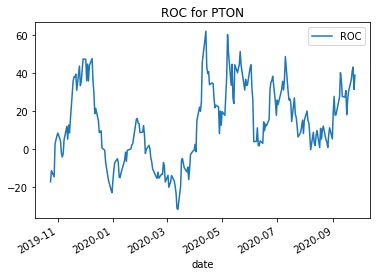

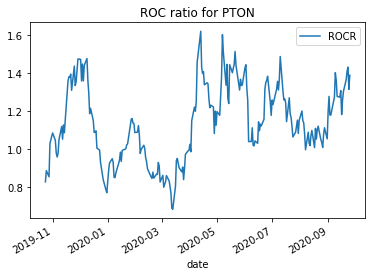

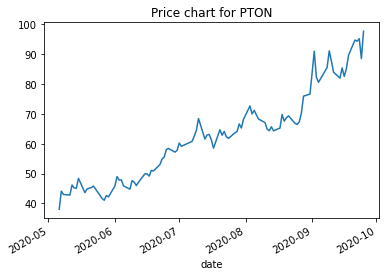

In [109]:
pton_roc, q = ti.get_roc(symbol = 'pton', interval = 'daily', time_period = 20)
print(pton_roc.tail(2))

pton_rocr, q = ti.get_rocr(symbol = 'pton', interval = 'daily', time_period = 20)
print(pton_rocr.tail(2))

pton_p, pton_m = ts.get_daily(symbol = "pton")
print(pton_p.tail(2))

pton_roc.plot()
plt.title('ROC for PTON')
plt.show() 

pton_rocr.plot()
plt.title('ROC ratio for PTON')
plt.show() 

pton_p['4. close'].plot()
plt.title('Price chart for PTON')
plt.show()

## Closing
There are a lot of technical indicators present within the financial industry. AlphaVantage has most of the essential indicators within their package, and this notebook has covered most of the important ones that are available within the package. 

The charts here are pretty bad and certainly require lots of help to improve their presentability. Do not be complacent with my work and try to come up with interesting combinations. 